In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Q1.csv")

In [ ]:
df

,Timestamp,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,3/10/2018 0:00,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0
1,3/10/2018 0:00,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0
2,3/10/2018 0:00,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0
3,3/10/2018 0:00,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0
4,3/10/2018 0:00,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0
...,...,...,...,...,...,...,...,...,...,...
13842,10/17/2018 15:31,39.781958,39.366774,35.699109,34.977640,1.487568,1.888282,1.005966,1.792363,1
13843,10/17/2018 15:32,39.628272,39.461169,35.665838,35.052602,1.489291,1.752119,1.001954,1.742410,1
13844,10/17/2018 15:32,39.612208,39.890494,35.971746,34.636423,1.482300,1.850078,1.018153,1.804849,1
13845,10/17/2018 15:45,39.822699,39.725013,35.558900,34.845422,1.528402,1.937668,0.818741,1.351930,1


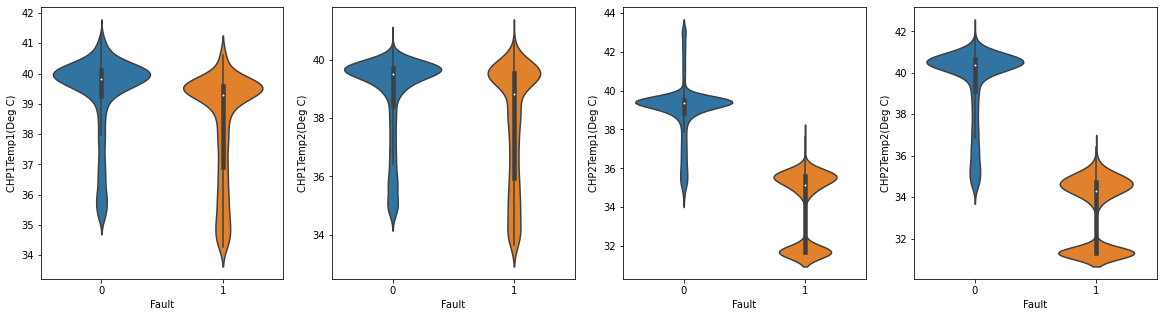

In [ ]:
lst = [(0, [1,1]), (1, [1,2]), (2, [2,1]), (3, [2,2])]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for x in lst:
  sns.violinplot(data=df, x='Fault', y=f'CHP{x[1][0]}Temp{x[1][1]}(Deg C)', ax = axes[x[0]])

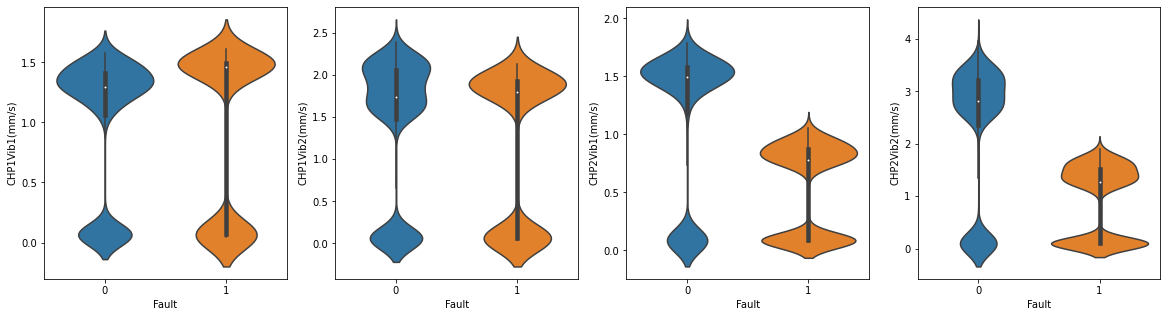

In [ ]:
lst = [(0, [1,1]), (1, [1,2]), (2, [2,1]), (3, [2,2])]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for x in lst:
  sns.violinplot(data=df, x='Fault', y=f'CHP{x[1][0]}Vib{x[1][1]}(mm/s)', ax = axes[x[0]])

In [ ]:
df['CHP2VibAvg'] = (df['CHP2Vib1(mm/s)']+df['CHP2Vib2(mm/s)']) / 2
df['CHP2TempAvg'] = (df['CHP2Temp1(Deg C)']+df['CHP2Temp2(Deg C)']) / 2

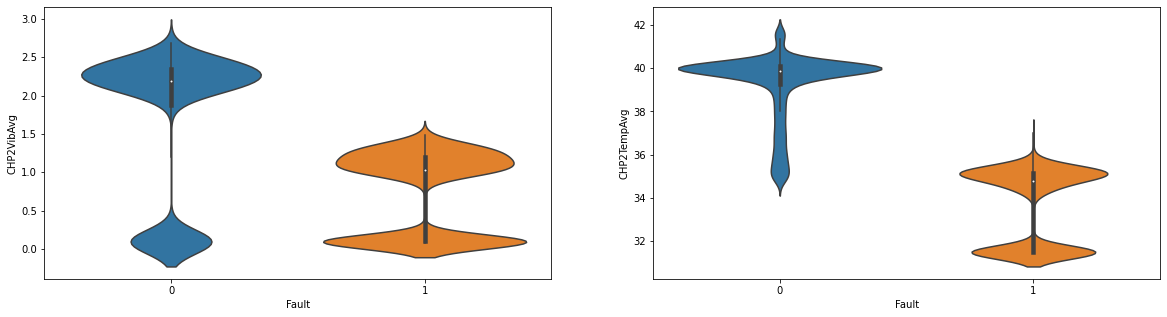

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.violinplot(data=df, x='Fault', y=f'CHP2VibAvg', ax = axes[0])
sns.violinplot(data=df, x='Fault', y=f'CHP2TempAvg', ax = axes[1])

In [ ]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split

X = df[['CHP2Vib1(mm/s)', 'CHP2Vib2(mm/s)', 'CHP2Temp1(Deg C)', 'CHP2Temp2(Deg C)', 'CHP2VibAvg', 'CHP2TempAvg']]
y = df['Fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1649    0]
 [   0 1121]]

True Positives(TP) =  1649

True Negatives(TN) =  1121

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
import joblib

joblib.dump(clf, "clf.pkl")

['clf.pkl']